In [ ]:
%pip install numpy elephant quantities neo matplotlib

# Introduction

In this notebook, you will learn how to use the Neo, Elephant, and quantities packages to work with electrophysiological data.

In [3]:
import quantities as pq
import neo

import numpy as np
import matplotlib.pyplot as plt

## Section 1

### Quantities: Adding units to variables

Checking the units of your final answer in a calculation is a good way to make sure that your calculation is correct. If your answer has the wrong units, then there's definitely something wrong with the calculation. In Python, we typically don't have units attached to variables, so we have to keep track of them through a calculation ourselves. However, there are libraries that allow you to attach units to variables, so that it can be kept track of automatically. One of those libraries is quantities, which we'll be working with in this section.

| Code | Description |
| :-- | :-- |
| `pq.A` | Creates the quantities unit Ampere |
| `pq.V` | Creates the quantities unit Volt |
| `pq.Hz` | Creates the quantities unit Hertz |
| `pq.s` | Creates the quantities unit seconds|
| `pq.ms` | Creates the quantities unit milliseconds|
| `pq.` | If you only write "``pq.``", you will see a list of all the functions and attributes belonging to `pq`. The attributes will be the different units you can create. Scrolling through the list is one way to find the unit you need. |
| `x = 10*pq.Hz` | Creates the a variable `x` containing the value ``10`` with the unit ``Hz`` (Hertz) attached. |
|`x = np.array([1,2,3] * pq.ms)`| Create a variable `x` containing three values with units milliseconds.|
|`x.units`| Get the units of the variable `x`.|
|`x.magnitude`| Get the magnitude (value) of the variable `x` without the unit.|
|`x * y` or `x / y`| Multiplication or division between two variables with units will also multiply or divide the units of those variables.|

**Example**: Create a variable named ``current`` that has the value 5 and unit Ampere (A). Display the `current` variable. 

The output should be `array(5.) * A`, which says that it's an array containing the value 5 multiplied with the unit A (for Ampere).

In [4]:
current = 5*pq.A

current

array(5.) * A

**Exercise**: Create a variable named ``potential`` which contains a the value ``10`` and has the unit Volt. Display the `potential` variable.

In [5]:
# solution


**Exercise**: Create and display a variable named ``time_points`` which contains the three values ``[10,20,30]`` and has the unit seconds.

In [6]:
# solution


**Exercise**: Get the units of the ``potential`` variable. The output should be `array(1.) * V`.

In [7]:
# solution


**Exercise**: Get the units of the ``time`` variable. The output should be `array(1.) * s`.

In [8]:
# solution


**Exercise**: Get the values (the magnitude) of the ``time_points`` variable (that is, the values of the array without the unit). The output should be `array([10., 20., 30.])`.

In [9]:
# solution


**Exercise**: Multiply distance a with distance b. What's the resulting unit?

In [10]:
a = 10*pq.m
b = 2*pq.m

In [10]:
# solution


**Exercise**: Divide distance ``a`` with distance ``b``. What unit does the result have?

In [ ]:
# provided

a = 10*pq.m
b = 2*pq.m

In [11]:
# solution


**Exercise**: Divide the ``potential`` by the ``current``. What's the resulting unit?

In [14]:
# provided

potential = [4,8,10]*pq.V
current = [2,4,2]*pq.A

In [12]:
# solution


## Section 2

### Neo: Representing Electrophysiology Data in Python

With Neo, you can store data, metadata, as well as the relationships between different parts of the data together in one Neo object.

#### Representing time series data

- `AnalogSignal`: Continuous data sampled in **regular** intervals
- `IrregularlySampledSignal`: Continuous data sampled in **irregular** intervals

![ImageSequence](Resources/base_schematic_2.png)

| Code | Description |
| :-- | :-- |
| `anasig = neo.AnalogSignal(signal, units = pq.V, sampling_rate, t_start)` | Creates an analog signal neo object containing continuous signal data sampled at **regular** intervals. *Required metadata*: physical unit of samples, timestamps of the samples (first timestamp and sampling interval)|
|`anasig.annotate(quality='excellent', date='2030-05-27)`| Add annotations (additional, optional metadata) to the neo AnalogSignal object.|
|`spiketrain = neo.SpikeTrain(timestamps, units='ms',t_stop=300*pq.ms)`| Make a neo SpikeTrain object containing the timestamps at which a cell spiked. `t_stop` specificies when the end of the time window (the highest possible timestamp value) in units of milliseconds (``pq.ms``).|
|`neo_object.magnitude`| Get the values (the magnitude of the signal, for example) of the neo object without the unit.|
|`neo_object.units`| Get the units of neo object.|
|`np.random.random(size=(nrows,ncols))`| Creates an array containing random values between 0 and 1 with `nrows` number of rows and `ncols` number of columns. |


**Example**: Create an AnalogSignal object out of the `recorded_potential` variable representing a fictional LFP trace from a single channel. The signal object should have units `V` (Volt), a sampling rate of 1000 Hz, and start at ``0 ms``.

In [16]:
recorded_potential = [0,1,2,3,4,5,5,4,3,2,1,0]

In [17]:
# solution

lfp_trace = neo.AnalogSignal(recorded_potential,
                            units='V', 
                            sampling_rate=1000.*pq.Hz,
                            t_start=0*pq.ms)

lfp_trace

AnalogSignal with 1 channels of length 12; units V; datatype int32
sampling rate: 1000.0 Hz
time: 0.0 ms to 12.0 ms

**Exercise**: Create an AnalogSignal object of the ``recorded_potential`` variable containing fictional LFP traces from ``2`` recording channels with ``50`` samples over time. The signal should have units `uV` (microvolt), a sampling rate of ``10000 Hz``, and start at ``0 ms``.

In [141]:
# solution


**Exercise**: Create an AnalogSignal object containing generated random data with ``1000`` samples from ``8`` channels (hint: ``np.random.random((1000,8))``.) The signal should have units `mV` (millivolts) and a sampling rate of ``1000 Hz``, and start at ``100 ms``.

In [140]:
# solution


**Exercise**: Annotate your AnalogSignal from either the previous exercise or the example to say that it has that the quality of the recording was high. Display the variable containing the AnalogSignal to check that the annotations are included.

In [139]:
# solution


**Exercise**: Annotate your AnalogSignal from either the previous exercise or the example to say which date it was recorded (for example, today's date). Display the variable containing the AnalogSignal to check that the annotations are included.

In [138]:
# solution


**Exercise**: Annotate one of the your AnalogSignal that doesn't have any annotations yet with your own, made-up annotations. You can add multiple annotations at the same time, you don't have to write `.annotate` for every new annotation. Display the variable containing the AnalogSignal to check that the annotations are included.

In [ ]:
# solution


**DEMO**: You can still use normal plotting functions from matplotlib to plot your signal even when it's stored in a neo object together with meta data. Run the cell below to plot the (not so realistic) LFP trace created in the example above.

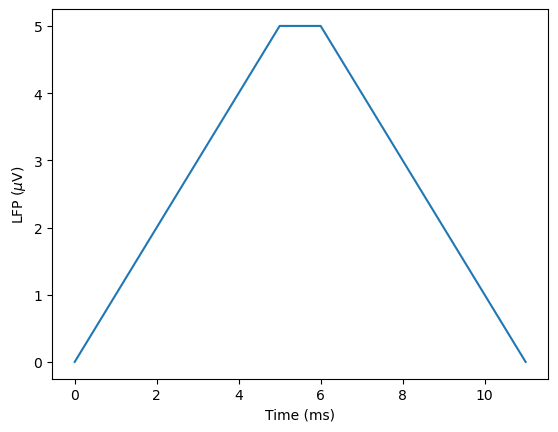

In [107]:
plt.plot(lfp_trace)
plt.xlabel('Time (ms)');
plt.ylabel(r'LFP ($\mu$V)');

You can also use ``neo`` to store spike train data together with metadata in the same object.

**Example**: Create a SpikeTrain object containing the timestamps (the time points at which the neuron fired) ``[50, 100, 200]`` of neuron. Give it units `ms` and have the period start at 0 and stop 300 ms. Display the spike train.

In [38]:
# solution

timestamps = [50, 100, 200]

spike_train = neo.SpikeTrain(timestamps,
                    units='ms',
                    t_start=0*pq.ms,
                    t_stop=300*pq.ms)

spike_train

SpikeTrain containing 3 spikes; units ms; datatype float64 
time: 0.0 ms to 300.0 ms

You can always show the timestamps by typing `.magnitude` behind the spike train object, like in the cell below (simply run it, you don't need to add to the code).

In [ ]:
spike_train.magnitude

array([ 50., 100., 200.])

**Exercise**: Create a SpikeTrain object out of the variable `timestamps` containing the time points at which a neuron fired. Give it units `ms` and have the period start at 100 and stop 300 ms. Display the spike train. How many spikes does it say that there are?

In [40]:
timestamps = [120,140,160,180,200,220,240]

In [136]:
# solution


**Exercise**: Get the magnitude of the neo SpikeTrain object. 

In [137]:
# solution


**Exercise**: Create a SpikeTrain object out of the variable `timestamps` containing the time points another neuron fired. Give it units `s` (seconds) and have the period start at ``1 s`` and stop ``5 s``. Display the spike train.

In [43]:
timestamps = [1.1,2.1,3.1,4.5]

In [135]:
# solution


## Section 3

### Elephant for analyzing spike data

Elephant is a library in Python made specifically for analyzing electrophysiological data. In this section, you'll explore some of its functions to calculate 

| Code | Description |
| :-- | :-- |
| `spike_train = homogeneous_poisson_process(rate=some_rate*pq.Hz, t_start=0.*pq.s, t_stop=10.*pq.s)` | Generates a poisson process spiketrain firing at a rate `some_rate` for 10 seconds. |
| `spike_train2 = homogeneous_gamma_process(a=3, b=10*pq.Hz, t_start=0.*pq.s, t_stop=10.*pq.s)` | Generates a gamma process spiketrain firing at a rate `some_rate` for 10 seconds. |
| `stats.mean_firing_rate(spike_train)` | Calculates the average firing rate of the spiketrain. |
| `isi = stats.isi(spike_train)` | Calculates the inter-spike interval (ISI) of the spiketrain.|
| `stats.cv2(isi)` | Calculates the spike interval variability (CV2 score) for a spike train. |
| `plt.eventplot([spike_train1.magnitude, spike_train2.magnitude])` | Creates a raster plot for two spike trains. |
| `stats.time_histogram(spike_trains=spike_train1, bin_size=1*pq.ms)` | Computes the spike counts per unit time (for example per millisecond) from timestamps. |

In [7]:
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
from elephant import statistics as stats

#### Generate spike data

Run the cell below to generate three spike trains using Elephant. Two spike trains are generated by a poisson process and the last one is generated by a gamma process.

In [97]:
np.random.seed(2)  
spike_trainA = homogeneous_poisson_process(rate=3*pq.Hz, t_start=0.*pq.s, t_stop=20.*pq.s)
spike_trainB = homogeneous_poisson_process(rate=6*pq.Hz, t_start=0.*pq.s, t_stop=20.*pq.s)
spike_trainC = homogeneous_gamma_process(a=3, b=6*pq.Hz, t_start=0.*pq.s, t_stop=20.*pq.s)

spike_trainA

SpikeTrain containing 68 spikes; units s; datatype float64 
time: 0.0 s to 20.0 s

Run the cell below to create a raster plot of the three spike trains.

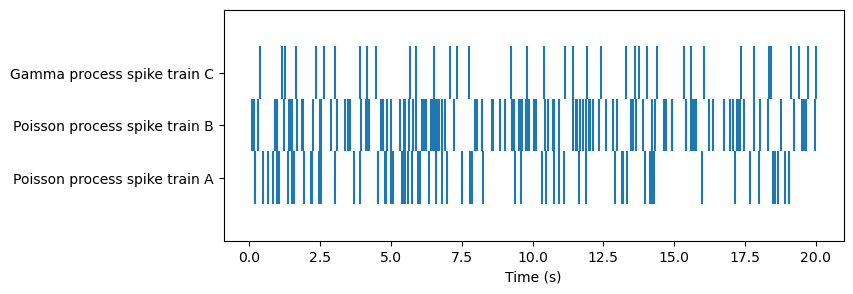

In [98]:
plt.figure(figsize=(8, 3))
plt.eventplot([spike_trainA.magnitude, spike_trainB.magnitude, spike_trainC.magnitude])
plt.xlabel('Time (s)')
plt.yticks([0, 1, 2], labels=["Poisson process spike train A", "Poisson process spike train B", "Gamma process spike train C"]);

**Example**: Calculate average firing rate of spike train A.

In [99]:
firing_rate = stats.mean_firing_rate(spike_trainA)
firing_rate

array(3.4) * 1/s

**Exercise**: Calculate the average firing rate of spike train B.

In [134]:
# solution


**Exercise**: Calculate the average firing rate of the third spike train

In [133]:
# solution


You can calculate the inter-spike intervals (ISI) for a spike train where you get the unit included (it should say `* s` at the end of the array containing the ISIs when you display it).

**Example**: Calculate the ISI for spike train A using ``elephant``'s function ``stats.isi``.

In [ ]:
isi_spike_trainA = stats.isi(spike_trainA)

isi_spike_trainA

**Exercise**: Calculate the ISI for spike train B.

In [131]:
# solution


**Exercise**: Calculate the ISI for spike train C.

In [130]:
# solution


The interspike intervals can be used to determine whether a spiking neuron is in a bursting, tonic, or poisson firing mode. A bursting neuron fires very often in a short time window but is otherwise mostly silent. A tonic firing mode means that the neuron is firing at highly regular intervals. A poisson firing mode means that the neuron is firing at random and is neither bursting nor in tonic firing mode.

A metric to calculate the the spike interval variability called the CV2 score (``stats.CV2``) is computed from the interspike interval of a neuron. If the CV2 score is 1 (or close to 1), the neuron is firing in a poisson firing mode. If it's > 1, then the neuron is bursting. If it's 0 (or close to 0), then the neuron is in tonic firing mode.

**Example**: Calculate the CV2 of the inter-spike interval (ISI) spike train A.

In [ ]:
# solution

cv2_spike_trainA = stats.cv2(isi_spike_trainA)

cv2_spike_trainA

0.9653690108731857

**Exercise**: Calculate the CV2 of the inter-spike interval (ISI) spike train B.

In [129]:
# solution

**Exercise**: Calculate the CV2 of the inter-spike interval (ISI) spike train B.

Which spike trains have a CV2 score closest to 1? Is it the ones you would have expected considering which spike trains were generated with a poisson process?

In [128]:
# solution


The spike trains are stored as timestamps - that is, the time points at which the neuron fired. You can get the spike count within a given time bin (for example, 1 millisecond) with the `stats.time_histogram` function.

**Example**: Get and plot the spike count per milisecond of spike train A.

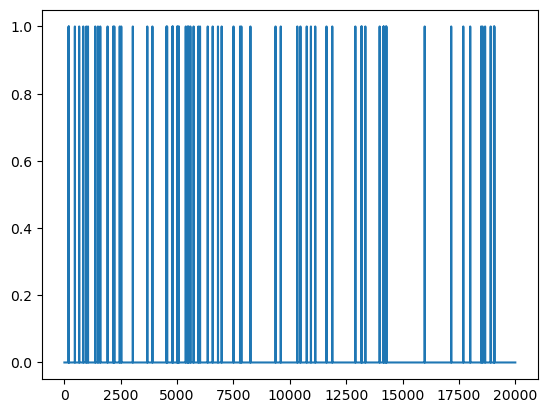

In [127]:
# solution

spike_countA = stats.time_histogram(spiketrains=spike_trainA, bin_size=1*pq.ms)
plt.plot(spike_countA.magnitude)

**Exercise**: Change the `bin_size` parameter inside the `time_histogram` function to 100 ms (tip: ``bin_size = 100*pq.ms``). Get and plot the spike count per 100 milisecond of spike train A.

In [125]:
# solution


**Exercise**: Get and plot the spike count per 100 milisecond of spike train C.

In [124]:
# solution


**Exercise**: Get and plot the spike count per 500 milisecond of spike train B.

In [1]:
# solution
